# Firefighter Fatalities Investigation

This Jupyter Notebook investigates firefighter fatalities from a public dataset provided by the Federal Emergency Management Agency (FEMA). The U.S. Fire Administration tracks and collects information on the causes of on-duty firefighter fatalities that occur in the United States. This dataset contains this collected data which is hosted on the FEMA website. Below is the current link for this dataset as of 09/18/2020.

Link: https://apps.usfa.fema.gov/firefighter-fatalities/

## Motivation For Investigation

My personal motivation for investigating this dataset is because I want to, in the near future, become a volunteer firefighter myself. I find firefighting to be such a rewarding way to give back to the community around me and hope to become a part of this community someday. Thus, I think it would be useful to have some background knowledge regarding firefighting prior to enrolling as a volunteer firefighter. This dataset provides me one way to do this by becoming better equiped to knowing the analysis of firefighters deaths with the hope that one day this knowledge could help prevent a future firefighter death whether it be a fellow firefighter or myself.

## Introductory Analysis

Below analysis on the dataset starts by importing the needed python libraries and dataset into this Jupyter Notebook. This provides a fire glance into the what the dataset contains.

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [71]:
df = pd.read_csv('ff_data_2021.csv')
df_origianl = df.copy()

In [72]:
df.head()

,Initial summary,First name,Last name,Middle name,Age,Rank,Classification,Incident date,Date of death,Cause of death,Nature of death,Activity,Emergency,Duty,Property type,Memorial fund info
0,Firefighter Pollard was driving a rescue vehic...,Robert,Pollard,Dale,64.0,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Cerebrovascular Accident,Riding Vehicle/Apparatus,Yes,Responding,Outdoor Property,NaN
1,Pump Operator/Inspector Purdy was operating a ...,Lee,Purdy,A.,57.0,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,On-Scene Fire,Residential,NaN
2,First Assistant Chief Osadacz was on the scene...,Ronald,Osadacz,J.,36.0,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,Responding,Street/Road,NaN
3,Firefighter Streeter responded to a trash and ...,Allen,Streeter,L.,58.0,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,On-Scene Fire,Outdoor Property,NaN
4,Firefighter Bankert was participating in fire ...,Gary,"Bankert, Sr",Lynn,37.0,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Caught or Trapped,Drowning,Other,No,Training,NaN,NaN


In [73]:
columns = list(df.columns)
fixed_cols = []

# Format the column names to be lowercase and have a underscore instead of spaces
for col in columns:
    col = col.lower()
    col = col.replace(' ', '_')
    fixed_cols.append(col)

df.columns = fixed_cols
df.head()

,initial_summary,first_name,last_name,middle_name,age,rank,classification,incident_date,date_of_death,cause_of_death,nature_of_death,activity,emergency,duty,property_type,memorial_fund_info
0,Firefighter Pollard was driving a rescue vehic...,Robert,Pollard,Dale,64.0,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Cerebrovascular Accident,Riding Vehicle/Apparatus,Yes,Responding,Outdoor Property,NaN
1,Pump Operator/Inspector Purdy was operating a ...,Lee,Purdy,A.,57.0,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,On-Scene Fire,Residential,NaN
2,First Assistant Chief Osadacz was on the scene...,Ronald,Osadacz,J.,36.0,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,Responding,Street/Road,NaN
3,Firefighter Streeter responded to a trash and ...,Allen,Streeter,L.,58.0,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildl...,Yes,On-Scene Fire,Outdoor Property,NaN
4,Firefighter Bankert was participating in fire ...,Gary,"Bankert, Sr",Lynn,37.0,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Caught or Trapped,Drowning,Other,No,Training,NaN,NaN


In [74]:
# Drop the Initial Summary Column for now since it full of supplimentary and not needed information regarding the incident.
df = df.drop(columns=['initial_summary'])

# Convert the dates to datetime for easy manipulation
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

## Understanding Which Firefighters Are At Risk

Here several graphs are shown to help visualize which group(s) of firefighters are at risk of workplace fatalities.

The first obvious group of firefighters that we can see from the dataset is the group that tragically lost their lives during 9/11. 15% of all firefighter fatalities occured on this day of history.

In [101]:
df_911 = df.loc[df['incident_date'] == pd.Timestamp('2001-09-11')]
df_911 = df_911.loc[df_911['emergency'].str.lower() == 'yes']

percent_911 = round(len(df_911) / len(df), 2) * 100
percent_rest = 100 - percent_911

print(f'{percent_911}% of firefighter fatalities occured on 9/11.')

15.0% of firefighter fatalities occured on 9/11.


In [102]:
df_911.head()

,first_name,last_name,middle_name,age,rank,classification,incident_date,date_of_death,cause_of_death,nature_of_death,activity,emergency,duty,property_type,memorial_fund_info
189,Glenn,Winuk,J.,40.0,Firefighter,Volunteer,2001-09-11,2001-09-11,Collapse,Crushed,EMS/Patient Care,Yes,On-Scene Fire,Store/Office,NaN
190,Peter,Brennan,NaN,NaN,Firefighter,Career,2001-09-11,2001-09-11,Collapse,Trauma,Search and Rescue,Yes,On-Scene Fire,Store/Office,NaN
191,Michael,Brennan,Emmett,NaN,Firefighter,Career,2001-09-11,2001-09-11,Collapse,Trauma,Search and Rescue,Yes,On-Scene Fire,Store/Office,NaN
192,Edward,D'Atri,A.,NaN,Lieutenant,Career,2001-09-11,2001-09-11,Collapse,Trauma,Search and Rescue,Yes,On-Scene Fire,Store/Office,NaN
193,James,Corrigan,J.,NaN,Fire Safety Director,Industrial,2001-09-11,2001-09-11,Collapse,Trauma,Search and Rescue,Yes,On-Scene Fire,Store/Office,NaN


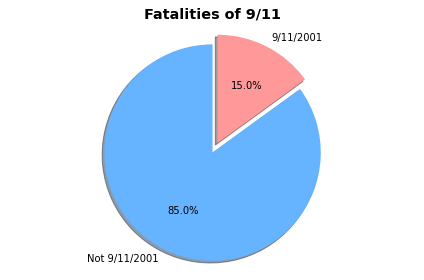

In [113]:
labels = ['Not 9/11/2001', '9/11/2001']
sizes = [percent_rest, percent_911]

explode = (0, 0.1)
colors = ['#66b3ff','#ff9999']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.set_title('Fatalities of 9/11', fontweight='bold', size='x-large')

plt.tight_layout()
plt.show()